<a href="https://colab.research.google.com/github/rlawo5219/bigDataPJ/blob/main/big_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 나눔고딕 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
# missingno라는 라이브러리가 설치되어 있을 경우 import
#결측치 예측 라이브러리
try:
    import missingno as msno
# missingno라는 라이브러리가 설치되어 있지 않을 경우 설치 후 import
except:
    !pip install missingno
    import missingno as msno

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (45.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [2]:
#서울시 지하철 호선별 역별 승하차 인원 정보 데이터를 불러와 metro_all에 저장
# pd.read_csv를 통하여 승하차 인원 정보 데이터를 데이터프레임 형태로 읽어옵니다.
metro_all = pd.read_csv("/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding = 'cp949')

# 승하차 인원 정보 상위 5개 데이터를 출력합니다.
metro_all.head()

# 승하차 인원 정보 데이터프레임 정보를 요약하여 출력합니다.
metro_all.info()


#불러온 두 데이터프레임의 특정 컬럼 데이터를 중복없이 오름차순 정렬하여 확인

# metro_all DataFrame 사용월 데이터 확인
sorted(list(set(metro_all['사용월'])))

# metro_all DataFrame 호선명 데이터 확인
sorted(list(set(metro_all['호선명'])))

# DataFrame 지하철역 데이터 확인
sorted(list(set(metro_all['지하철역'])))

# DataFrame 지하철역 데이터 개수 확인
len(list(set(metro_all['지하철역'])))

# 2021년 6월 총 승객수만 추출
metro_recent = metro_all[metro_all['사용월']==202310]
metro_recent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62487 entries, 0 to 62486
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           62487 non-null  int64 
 1   호선명           62487 non-null  object
 2   지하철역          62487 non-null  object
 3   04시-05시 승차인원  62487 non-null  int64 
 4   04시-05시 하차인원  62487 non-null  int64 
 5   05시-06시 승차인원  62487 non-null  int64 
 6   05시-06시 하차인원  62487 non-null  int64 
 7   06시-07시 승차인원  62487 non-null  int64 
 8   06시-07시 하차인원  62487 non-null  int64 
 9   07시-08시 승차인원  62487 non-null  int64 
 10  07시-08시 하차인원  62487 non-null  int64 
 11  08시-09시 승차인원  62487 non-null  int64 
 12  08시-09시 하차인원  62487 non-null  int64 
 13  09시-10시 승차인원  62487 non-null  int64 
 14  09시-10시 하차인원  62487 non-null  int64 
 15  10시-11시 승차인원  62487 non-null  int64 
 16  10시-11시 하차인원  62487 non-null  int64 
 17  11시-12시 승차인원  62487 non-null  int64 
 18  11시-12시 하차인원  62487 non-null  int64 
 19  12시-

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202310,1호선,동대문,688,23,11493,2221,9618,6755,14951,...,9061,555,2415,1,221,0,0,0,0,20231103
1,202310,1호선,동묘앞,208,1,3065,1120,3652,4528,7542,...,4288,85,1680,1,318,0,0,0,0,20231103
2,202310,1호선,서울역,700,16,8826,9093,13369,60044,42194,...,14003,2333,2475,2,184,0,0,0,0,20231103
3,202310,1호선,시청,60,1,2408,5020,4325,26689,8093,...,4416,323,855,0,12,0,0,0,0,20231103
4,202310,1호선,신설동,388,18,9245,2315,9988,8178,21304,...,9543,289,2263,0,0,0,0,0,0,20231103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,202310,중앙선,원덕,91,6,336,5,670,132,916,...,294,0,106,0,0,0,0,0,0,20231103
613,202310,중앙선,중랑,227,2,6919,568,10083,2094,23125,...,4807,34,504,0,0,0,0,0,0,20231103
614,202310,중앙선,지평,0,0,0,0,0,0,363,...,1,0,0,0,0,0,0,0,0,20231103
615,202310,중앙선,팔당,4,0,258,93,640,849,1624,...,171,2,0,0,0,0,0,0,0,20231103


In [3]:
# 불필요한 작업일자 컬럼 제거
metro_recent = metro_recent.drop(columns={'작업일자'})
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202310,1호선,동대문,688,23,11493,2221,9618,6755,14951,...,4866,9061,555,2415,1,221,0,0,0,0
1,202310,1호선,동묘앞,208,1,3065,1120,3652,4528,7542,...,1141,4288,85,1680,1,318,0,0,0,0
2,202310,1호선,서울역,700,16,8826,9093,13369,60044,42194,...,29305,14003,2333,2475,2,184,0,0,0,0
3,202310,1호선,시청,60,1,2408,5020,4325,26689,8093,...,10655,4416,323,855,0,12,0,0,0,0
4,202310,1호선,신설동,388,18,9245,2315,9988,8178,21304,...,3693,9543,289,2263,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,202310,중앙선,원덕,91,6,336,5,670,132,916,...,6,294,0,106,0,0,0,0,0,0
613,202310,중앙선,중랑,227,2,6919,568,10083,2094,23125,...,951,4807,34,504,0,0,0,0,0,0
614,202310,중앙선,지평,0,0,0,0,0,0,363,...,2,1,0,0,0,0,0,0,0,0
615,202310,중앙선,팔당,4,0,258,93,640,849,1624,...,200,171,2,0,0,0,0,0,0,0


<ipython-input-4-ac9d202d55c9>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metro_line = metro_recent.groupby(['호선명']).mean().reset_index()


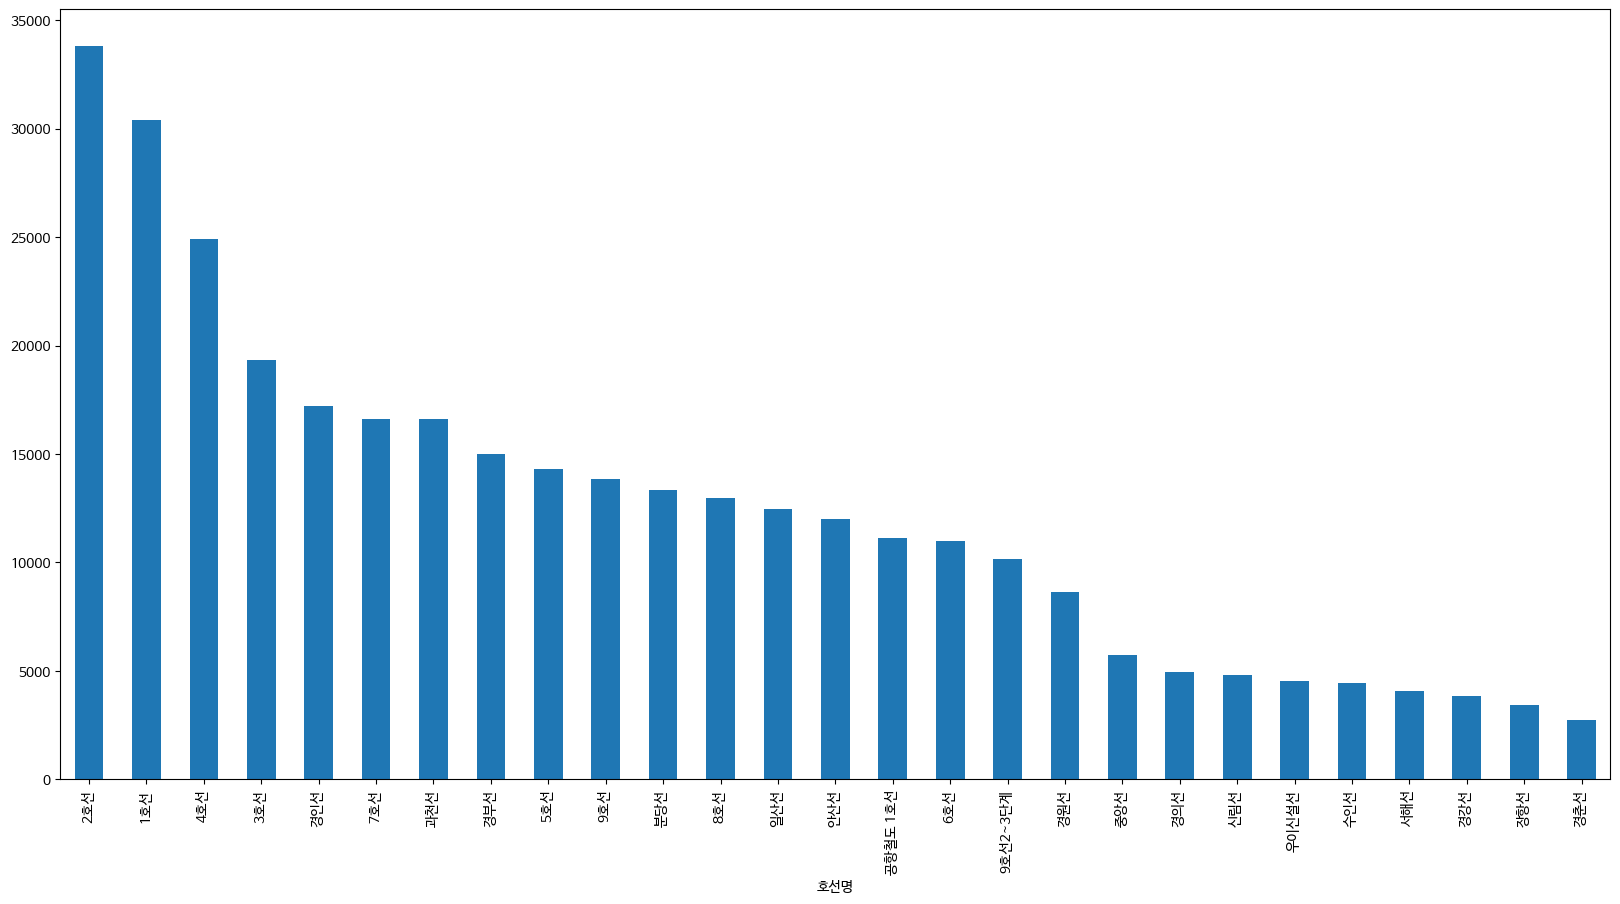

In [4]:
import matplotlib.font_manager as fm #공식적으로 알려진 한글 사용방법 , 폰트 관련용도

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

metro_line = metro_recent.groupby(['호선명']).mean().reset_index()

metro_line = metro_line.drop(columns='사용월').set_index('호선명')#drop 선택한 행,열을 삭제한 새로운 객체 생성
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

metro_line.plot(kind=('bar'))
plt.show()

In [6]:
line = '7호선'
metro_st = metro_recent.groupby(['호선명','지하철역']).mean().reset_index()
metro_st_line2 = metro_st[metro_st['호선명']==line]
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
215,7호선,가산디지털단지,202310.0,688.0,7.0,7463.0,5849.0,9935.0,31118.0,22783.0,...,11499.0,8372.0,1461.0,2895.0,3.0,2.0,0.0,0.0,0.0,0.0
216,7호선,강남구청,202310.0,21.0,1.0,1892.0,1886.0,4055.0,18284.0,7351.0,...,9213.0,3863.0,1514.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0
217,7호선,건대입구,202310.0,43.0,1.0,4607.0,1099.0,5261.0,8384.0,13126.0,...,11232.0,6904.0,1643.0,3482.0,0.0,212.0,1.0,1.0,0.0,0.0
218,7호선,고속터미널,202310.0,50.0,3.0,1227.0,2806.0,3523.0,21786.0,11919.0,...,10209.0,3015.0,639.0,712.0,0.0,2.0,0.0,0.0,0.0,0.0
219,7호선,공릉(서울과학기술대),202310.0,17.0,0.0,6658.0,1118.0,14639.0,4420.0,36052.0,...,4785.0,11634.0,729.0,3844.0,0.0,0.0,0.0,0.0,0.0,0.0
220,7호선,광명사거리,202310.0,165.0,4.0,19636.0,6971.0,28375.0,11043.0,70925.0,...,3566.0,14584.0,526.0,4058.0,0.0,6.0,0.0,0.0,0.0,0.0
221,7호선,군자(능동),202310.0,55.0,0.0,9618.0,901.0,14749.0,6400.0,36850.0,...,6991.0,10096.0,1163.0,3180.0,0.0,29.0,0.0,0.0,0.0,0.0
222,7호선,남구로,202310.0,168.0,7.0,18214.0,1767.0,14858.0,8913.0,28889.0,...,3592.0,7515.0,465.0,1753.0,0.0,1.0,0.0,0.0,0.0,0.0
223,7호선,남성,202310.0,20.0,1.0,6491.0,960.0,14210.0,3817.0,38601.0,...,2439.0,10312.0,362.0,2877.0,0.0,1.0,0.0,0.0,0.0,0.0
224,7호선,내방,202310.0,4.0,0.0,2477.0,1569.0,8041.0,11471.0,18596.0,...,4478.0,6332.0,662.0,3055.0,0.0,242.0,0.0,0.0,0.0,0.0


In [7]:
# 승차 인원 컬럼만 추출
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st_line2['지하철역']
# metro_get_on['지하철역'] = metro_st['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
    # metro_get_on[metro_st.columns[3+2*i]] = metro_st[metro_st.columns[3+2*i]]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
가산디지털단지,688.0,7463.0,9935.0,22783.0,27018.0,20124.0,18917.0,23359.0,30065.0,34789.0,...,287494.0,114278.0,65571.0,49215.0,26724.0,11499.0,1461.0,3.0,0.0,0.0
강남구청,21.0,1892.0,4055.0,7351.0,10074.0,9229.0,9803.0,11688.0,14160.0,17531.0,...,85784.0,52840.0,33571.0,31242.0,21903.0,9213.0,1514.0,0.0,0.0,0.0
건대입구,43.0,4607.0,5261.0,13126.0,19465.0,16361.0,14830.0,16675.0,18259.0,20956.0,...,36323.0,26947.0,28406.0,24960.0,21082.0,11232.0,1643.0,0.0,1.0,0.0
고속터미널,50.0,1227.0,3523.0,11919.0,19075.0,25694.0,26184.0,28926.0,29534.0,30870.0,...,53749.0,37449.0,40940.0,35978.0,27926.0,10209.0,639.0,0.0,0.0,0.0
공릉(서울과학기술대),17.0,6658.0,14639.0,36052.0,42046.0,24925.0,19356.0,18686.0,19553.0,19348.0,...,23331.0,13968.0,11399.0,10857.0,9152.0,4785.0,729.0,0.0,0.0,0.0
광명사거리,165.0,19636.0,28375.0,70925.0,80221.0,44431.0,31465.0,30010.0,31917.0,31962.0,...,32481.0,21892.0,15043.0,11470.0,8551.0,3566.0,526.0,0.0,0.0,0.0
군자(능동),55.0,9618.0,14749.0,36850.0,55207.0,38672.0,22943.0,19798.0,20833.0,21123.0,...,34922.0,21160.0,17680.0,16937.0,13018.0,6991.0,1163.0,0.0,0.0,0.0
남구로,168.0,18214.0,14858.0,28889.0,33787.0,24078.0,16910.0,15095.0,16466.0,16218.0,...,68968.0,29114.0,16152.0,11448.0,7323.0,3592.0,465.0,0.0,0.0,0.0
남성,20.0,6491.0,14210.0,38601.0,55072.0,34769.0,21112.0,18689.0,19222.0,18401.0,...,15702.0,9557.0,7898.0,7636.0,5137.0,2439.0,362.0,0.0,0.0,0.0


In [8]:
# 하차 인원 컬럼만 추출
metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st_line2['지하철역']
# metro_get_off['지하철역'] = metro_st['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
    # metro_get_off[metro_st.columns[4+2*i]] = metro_st[metro_st.columns[4+2*i]]
metro_get_off = metro_get_off.set_index('지하철역')
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
가산디지털단지,7.0,5849.0,31118.0,129888.0,360504.0,198162.0,58344.0,35832.0,34954.0,37315.0,...,35753.0,24451.0,15789.0,13443.0,11835.0,8372.0,2895.0,2.0,0.0,0.0
강남구청,1.0,1886.0,18284.0,34565.0,99510.0,99017.0,40974.0,23963.0,21926.0,23489.0,...,21028.0,13776.0,8849.0,6975.0,5786.0,3863.0,1685.0,0.0,0.0,0.0
건대입구,1.0,1099.0,8384.0,19465.0,40138.0,28828.0,27541.0,22977.0,24424.0,27249.0,...,40595.0,26346.0,16547.0,13540.0,11315.0,6904.0,3482.0,212.0,1.0,0.0
고속터미널,3.0,2806.0,21786.0,37029.0,50523.0,37076.0,30872.0,27734.0,25452.0,29167.0,...,25381.0,16826.0,10537.0,9771.0,5520.0,3015.0,712.0,2.0,0.0,0.0
공릉(서울과학기술대),0.0,1118.0,4420.0,11102.0,24674.0,19328.0,14154.0,12535.0,15292.0,17018.0,...,41464.0,35135.0,20731.0,18456.0,17799.0,11634.0,3844.0,0.0,0.0,0.0
광명사거리,4.0,6971.0,11043.0,16560.0,24854.0,23312.0,23994.0,26967.0,28696.0,31301.0,...,74097.0,56661.0,32915.0,28497.0,23490.0,14584.0,4058.0,6.0,0.0,0.0
군자(능동),0.0,901.0,6400.0,10294.0,27153.0,17854.0,12770.0,12089.0,12575.0,14767.0,...,42207.0,33412.0,21192.0,19291.0,16238.0,10096.0,3180.0,29.0,0.0,0.0
남구로,7.0,1767.0,8913.0,30805.0,88353.0,42161.0,19470.0,15068.0,14141.0,15476.0,...,30688.0,22145.0,15612.0,17002.0,14486.0,7515.0,1753.0,1.0,0.0,0.0
남성,1.0,960.0,3817.0,6889.0,16398.0,12743.0,11789.0,12175.0,12336.0,13499.0,...,43113.0,31089.0,20792.0,18341.0,16159.0,10312.0,2877.0,1.0,0.0,0.0


In [9]:
# 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st_line2['지하철역'])
# df = pd.DataFrame(index = metro_st['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
가산디지털단지,46717,46884
강남구청,18926,20879
건대입구,16911,17582
고속터미널,23339,17933
공릉(서울과학기술대),14976,14839
광명사거리,24989,24613
군자(능동),18467,14429
남구로,17426,18077
남성,14093,13195


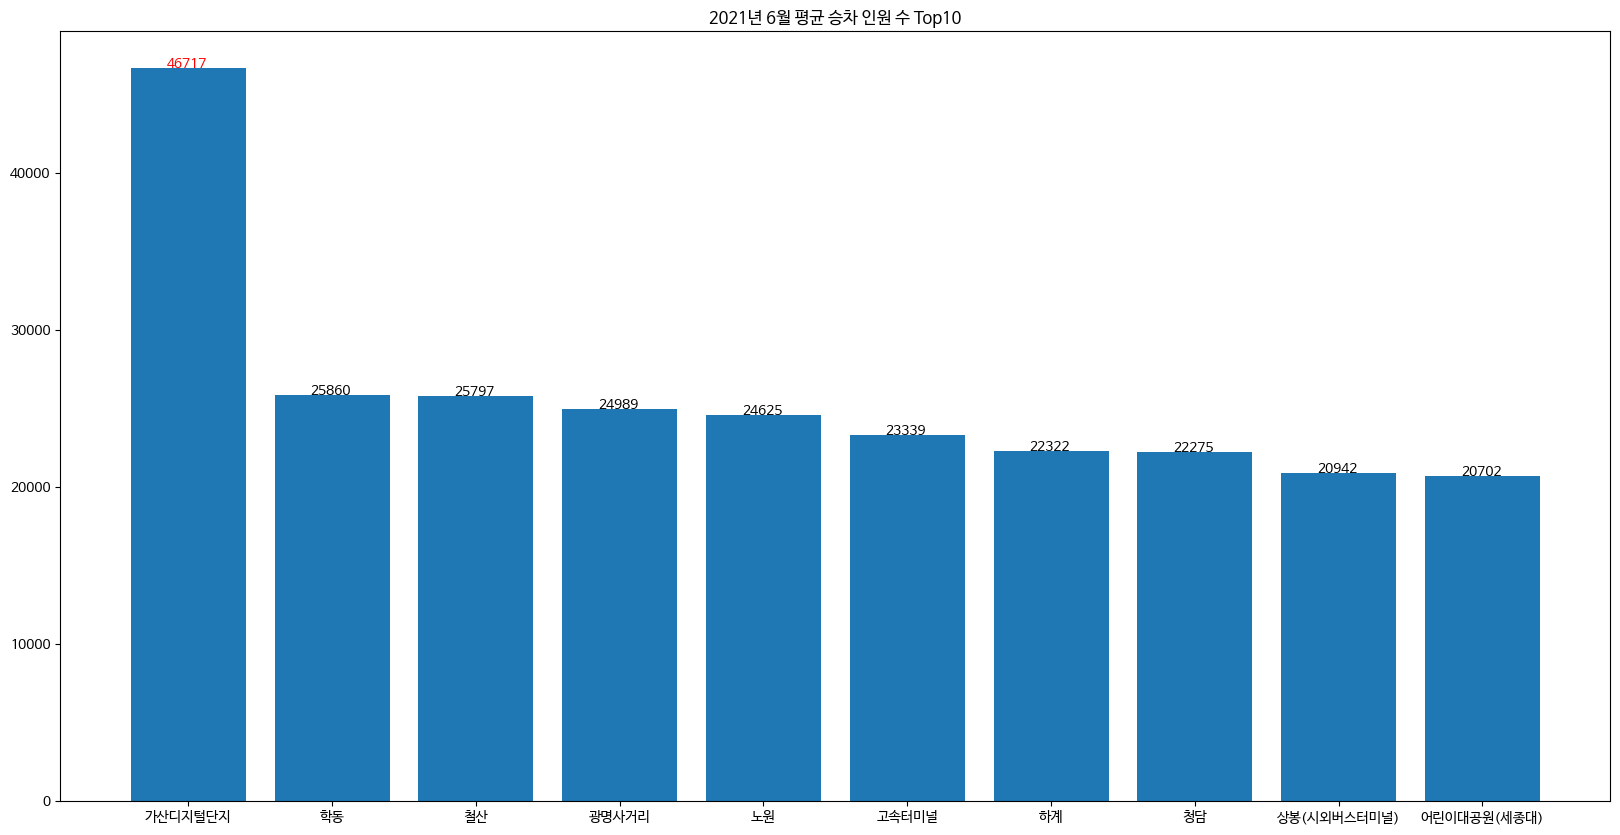

In [11]:
# 7호선 승차 인원 수 Top10
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2021년 6월 평균 승차 인원 수 Top10')
plt.show()

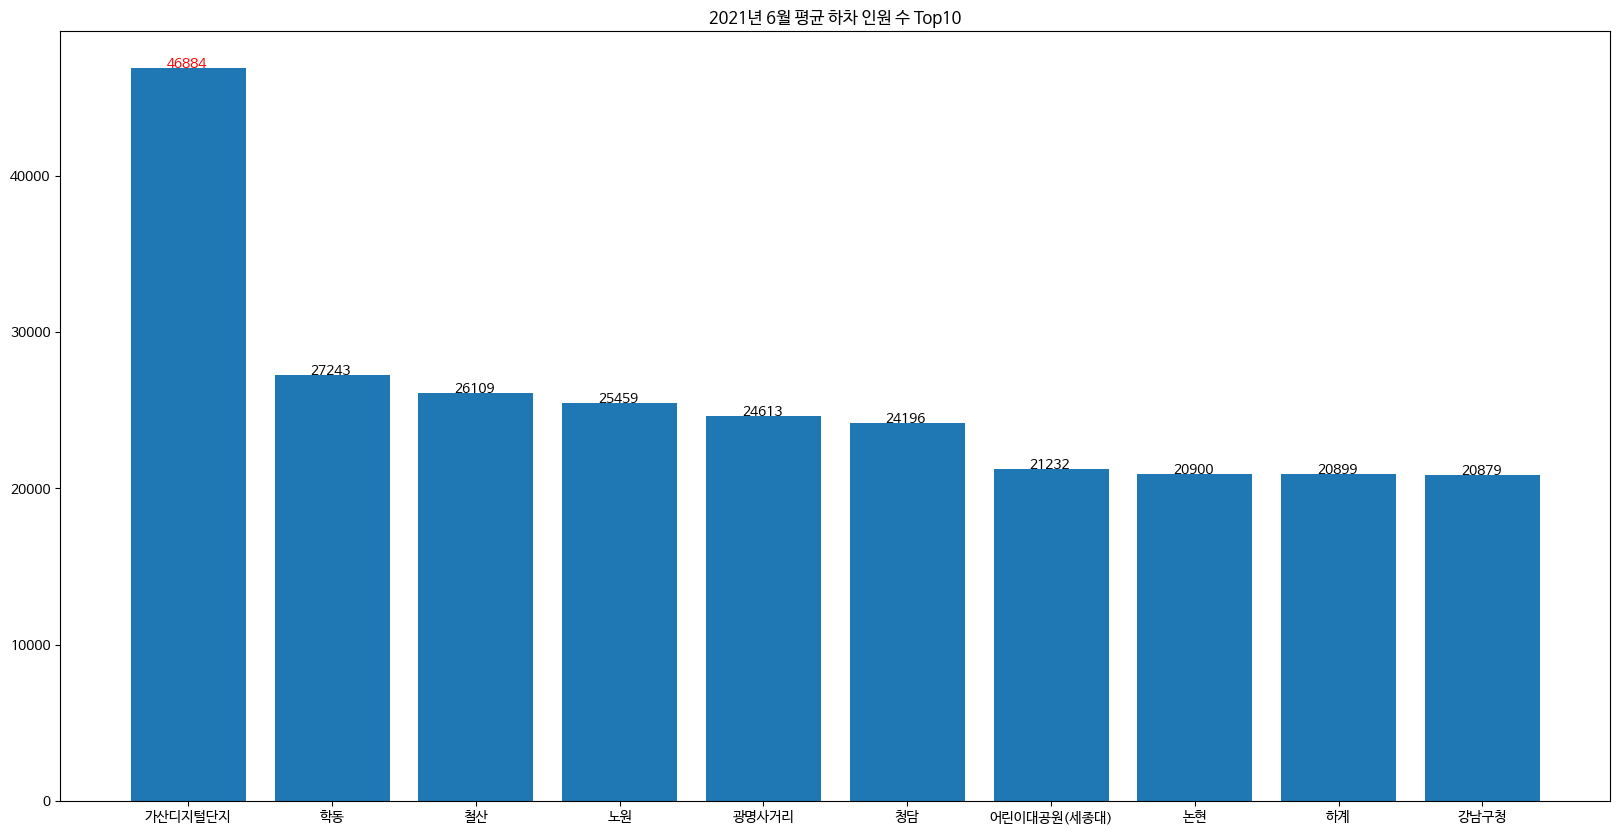

In [12]:
# 7호선 하차 인원 수 Top10
top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2021년 6월 평균 하차 인원 수 Top10')
plt.show()

In [13]:
# 승차 인원 컬럼만 추출
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_on[metro_st.columns[3+2*i]] = metro_st[metro_st.columns[3+2*i]]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,688.0,11493.0,9618.0,14951.0,20657.0,19909.0,18030.0,20354.0,24289.0,27555.0,...,25680.0,17817.0,15062.0,13799.0,10430.0,4866.0,555.0,1.0,0.0,0.0
동묘앞,208.0,3065.0,3652.0,7542.0,12370.0,11293.0,13116.0,18559.0,25794.0,34226.0,...,24843.0,10039.0,5844.0,4793.0,3530.0,1141.0,85.0,1.0,0.0,0.0
서울역,700.0,8826.0,13369.0,42194.0,75501.0,70759.0,67566.0,86329.0,96010.0,94744.0,...,220828.0,123025.0,89108.0,87580.0,59608.0,29305.0,2333.0,2.0,0.0,0.0
시청,60.0,2408.0,4325.0,8093.0,11102.0,14674.0,17236.0,22743.0,25560.0,31914.0,...,158616.0,69239.0,62691.0,53963.0,32319.0,10655.0,323.0,0.0,0.0,0.0
신설동,388.0,9245.0,9988.0,21304.0,31140.0,22327.0,19391.0,21086.0,23210.0,25190.0,...,49687.0,20869.0,13794.0,12004.0,8113.0,3693.0,289.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
원덕,91.0,336.0,670.0,916.0,1179.0,1075.0,1093.0,846.0,882.0,894.0,...,684.0,339.0,104.0,86.0,25.0,6.0,0.0,0.0,0.0,0.0
중랑,227.0,6919.0,10083.0,23125.0,20527.0,15769.0,10351.0,9682.0,9744.0,9471.0,...,7329.0,4996.0,3521.0,2775.0,2027.0,951.0,34.0,0.0,0.0,0.0
지평,0.0,0.0,0.0,363.0,234.0,7.0,421.0,4.0,8.0,136.0,...,58.0,198.0,0.0,10.0,11.0,2.0,0.0,0.0,0.0,0.0


In [14]:
# 하차 인원 컬럼만 추출
metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_off[metro_st.columns[4+2*i]] = metro_st[metro_st.columns[4+2*i]]
metro_get_off = metro_get_off.set_index('지하철역')
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,23.0,2221.0,6755.0,12017.0,20541.0,23460.0,26158.0,29870.0,29765.0,26616.0,...,22333.0,21418.0,14927.0,13295.0,12184.0,9061.0,2415.0,221.0,0.0,0.0
동묘앞,1.0,1120.0,4528.0,9281.0,21560.0,18828.0,25633.0,34461.0,38760.0,41942.0,...,11845.0,8575.0,6512.0,6467.0,7088.0,4288.0,1680.0,318.0,0.0,0.0
서울역,16.0,9093.0,60044.0,111515.0,226340.0,157304.0,85381.0,78226.0,87096.0,86624.0,...,95463.0,66792.0,48809.0,44886.0,29468.0,14003.0,2475.0,184.0,0.0,0.0
시청,1.0,5020.0,26689.0,70011.0,186809.0,91258.0,53117.0,51680.0,47710.0,47308.0,...,29295.0,14841.0,9941.0,8943.0,6830.0,4416.0,855.0,12.0,0.0,0.0
신설동,18.0,2315.0,8178.0,22493.0,52860.0,32651.0,22218.0,19811.0,19784.0,20747.0,...,30045.0,22603.0,15561.0,15576.0,13190.0,9543.0,2263.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
원덕,6.0,5.0,132.0,522.0,740.0,697.0,1078.0,991.0,995.0,506.0,...,976.0,709.0,572.0,503.0,350.0,294.0,106.0,0.0,0.0,0.0
중랑,2.0,568.0,2094.0,3427.0,6880.0,6168.0,4767.0,5232.0,6247.0,7230.0,...,20414.0,17770.0,11568.0,8898.0,8922.0,4807.0,504.0,0.0,0.0,0.0
지평,0.0,0.0,0.0,359.0,147.0,0.0,798.0,2.0,5.0,190.0,...,145.0,304.0,2.0,133.0,67.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
동대문,15585,15362
동묘앞,14071,14611
서울역,68456,64441
시청,32953,33256
신설동,17148,16582
...,...,...
원덕,564,527
중랑,7006,6781
지평,92,115


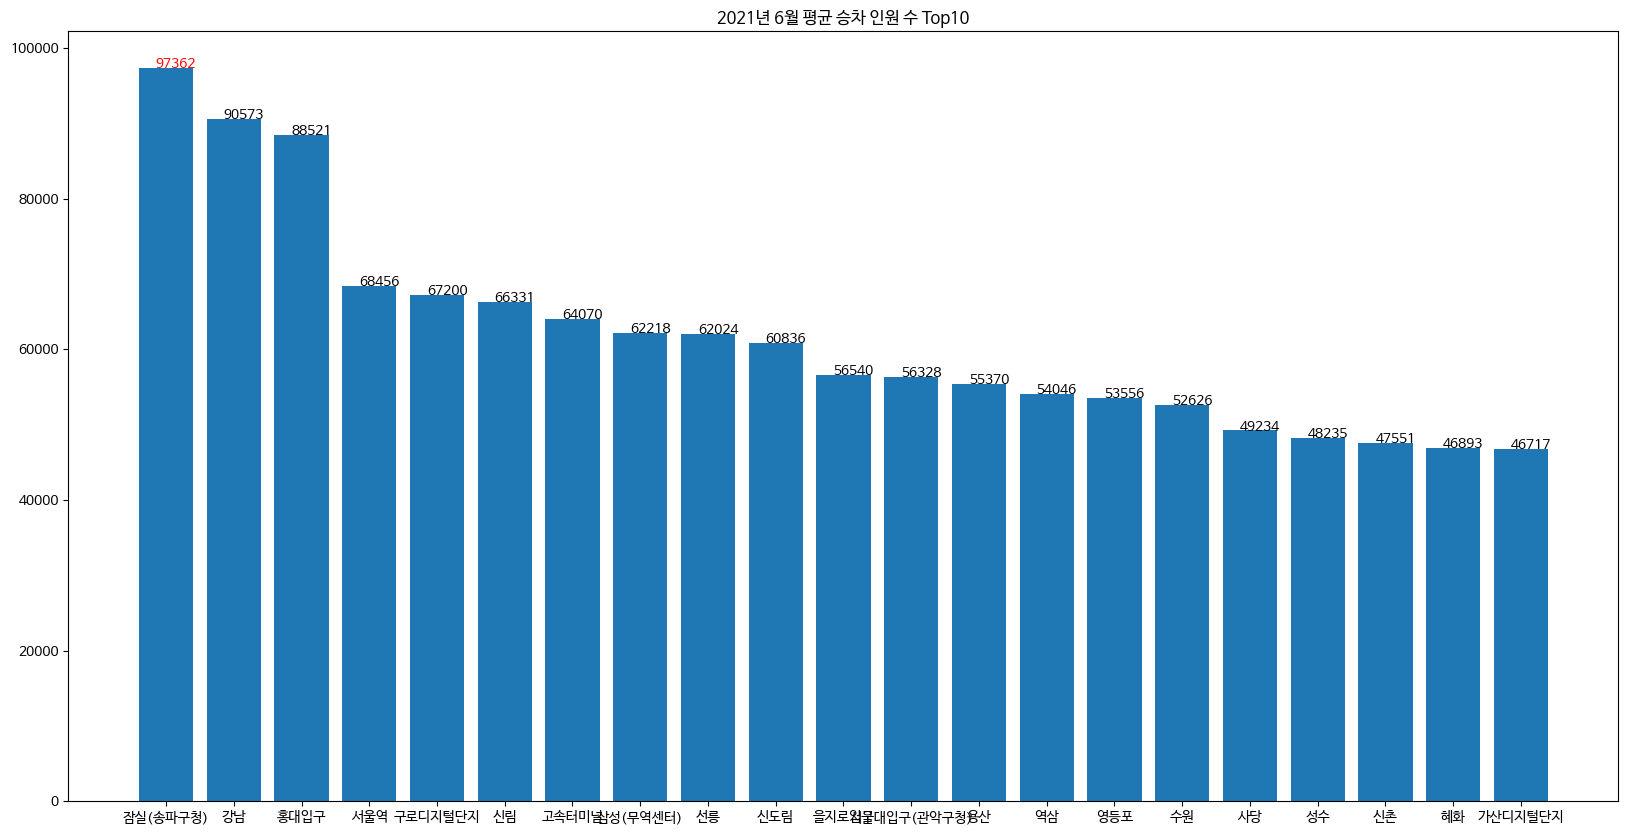

In [16]:
# 전체 승차 인원 수 Top21
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(21)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2021년 6월 평균 승차 인원 수 Top10')
plt.show()

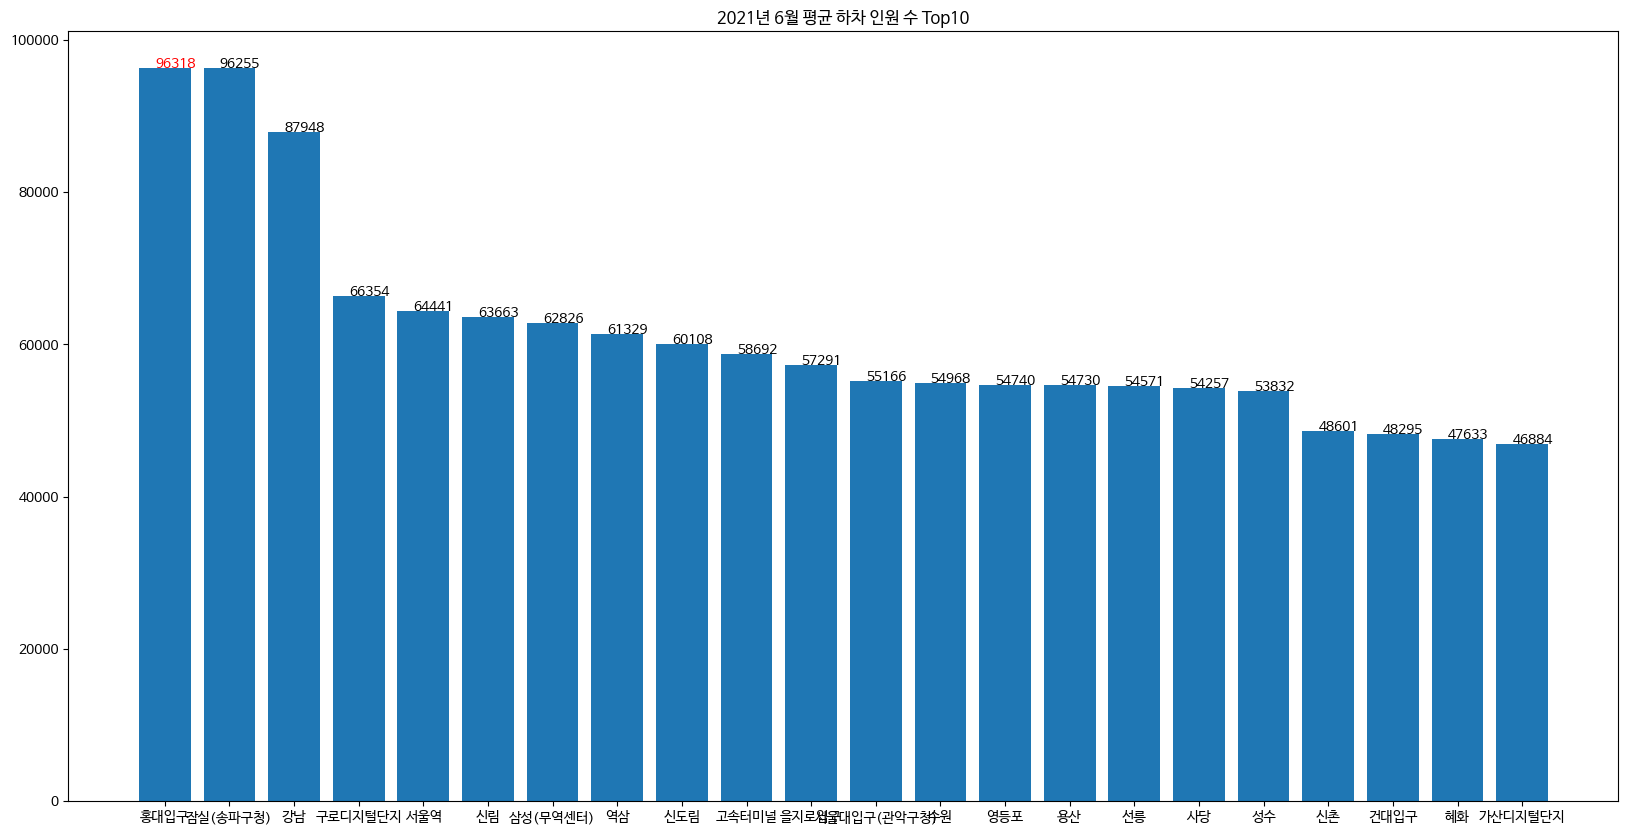

In [17]:
# 전체 하차 인원 수 Top22
top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(22)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2021년 6월 평균 하차 인원 수 Top10')
plt.show()